# Einführung in Python3

## Lernziele

1. Sie haben eine funktionierende python3 Installation und können jupyter-notebooks benutzen.
2. Sie sind mit der grundlegenden python3 Funktionalität vertraut.

## Aufträge

1. Installieren Sie (falls nicht schon lange geschehen) python3, numpy, scipy, matplotlib und jupyter.
2. Erarbeiten Sie das [Einführungsbeispiel](../../introduction/einfuehrungpython.ipynb).
3. Vervollständigen Sie das vorliegende Jupyter-Notebook.

## Aufgaben

### 1. Aufgabe

Erstellen Sie einen Graph der Funktion

$$f(x) = e^{-x^2/\sigma}$$

für $\sigma \in \{1/4,1/3,1/2\}$ inkl. Achsbeschriftung und Labels für $x\in [-2,2]$.

Text(0, 0.5, 'f(x)')

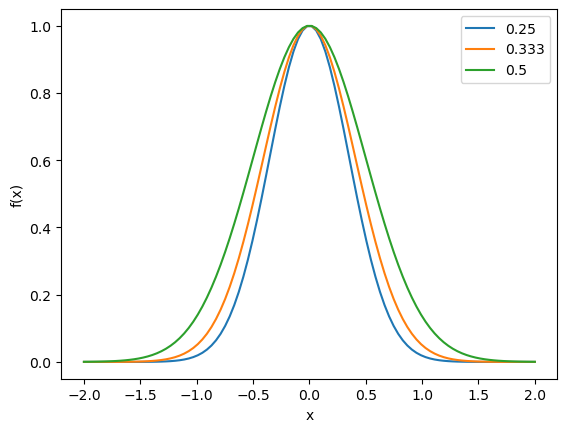

In [1]:
import matplotlib.pyplot as mpl
import numpy as np

sigma = [(1./4.),(1./3.),(1./2.)]
x = np.linspace(-2,2,100)
res = []

def f(x,sigma):
    return np.exp(-(np.square(x))/sigma)

res1 = f(x,sigma[0])
res2 = f(x,sigma[1])
res3 = f(x,sigma[2])

for n in range(len(sigma)):
    res.append(f(x,sigma[n]))
    mpl.plot(x,res[n])

mpl.legend(np.around(sigma,3))
mpl.xlabel('x')
mpl.ylabel('f(x)')




### 2. Aufgabe

1. Programmieren Sie eine effiziente Funktion, welche die geometrische Folge

   $$x_n = \{q^k\}_{k=0}^n$$

   für ein gegebenes $q$ und $n$ berechnet. Definieren Sie den Parameter $n$ mit dem Default-Wert 10.
   
2. Berechnen Sie das Skalarprodukt der beiden Vektoren gegeben durch die Folgen $\{0.5^k\}_{k=0}^{10}$ und $\{2^k\}_{k=0}^{10}$

In [2]:
import numpy as np

def x(q,n):
    k = np.linspace(0,n,n+1)
    return np.power(q,k)

n = 10

print(np.dot(x(0.5,n),x(2,n)))

11.0


Das Skalarprodukt dieser Vektoren beträgt folglich 11, was sich leicht überprüfen lässt:
$$0.5^k * 2^k = (0.5 * 2)^k = 1^k = 1, k \in \mathbf{R} \longrightarrow \sum_{k=0}^11 = 11$$

### 3. Aufgabe

Aus der Analysis kennen Sie den Grenzwert der Folge

$$\lim_{k\to\infty} \left(1+\frac{1}{2^k}\right)^{2^k} = e.$$

* Schreiben Sie ein Programm, welches die Folge berechnet und entscheiden, ob die numerische Berechnung korrekt ist.
  - Sie können mit Hilfe von `f = lambda x: x**2` inline Funktionen definieren.
* Wie gross kann $k$ gewählt werden?

euler approximation successful after 18 calculations
f(30) = 2.7182818271932465
f(31) = 2.7182818290919446
f(32) = 1.0
f(33) = 1.0


C:\Users\Samuel Maissen\AppData\Local\Temp\ipykernel_8112\3943815008.py:8: RuntimeWarning: divide by zero encountered in divide
  return np.power((1. + 1./(np.power(2,k))),np.power(2,k))


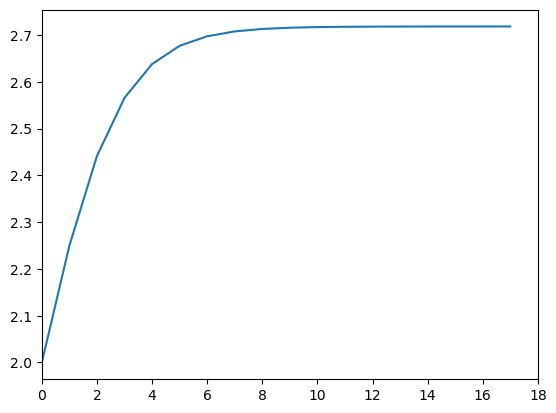

In [3]:
import numpy as np
import matplotlib.pyplot as mpl

kmax = 50
series = []

def seriesk(k):
    return np.power((1. + 1./(np.power(2,k))),np.power(2,k))

for k in range(kmax):
    value = seriesk(k)
    if ((np.e - value) > 1e-5):
        series.append(value)
    else:
        kmax = k
        print("euler approximation successful after " + str(kmax) + " calculations")
        break
mpl.plot(np.linspace(0,kmax-1,kmax),series)
mpl.xlim(0,kmax)

print("f(30) = " + str(seriesk(30)))
print("f(31) = " + str(seriesk(31)))
print("f(32) = " + str(seriesk(32)))
print("f(33) = " + str(seriesk(33)))


Es ist zu sehen, dass die Approximation der Euler'schen Zahl relativ einfach geht und nach 18 Iterationen schon auf 5 Nachkommastellen mit der Euler'schen Zahl übereinstimmt. Des Weiteren ist zu sehen,  dass k nicht grösser als 31 werden darf. Grund dafür ist, dass ab $2^{32}$ ein Overflow entsteht (irgendein Program/Library wird standardmässig mit 32 Bit rechnen).